Preamble and imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Logistic regression and binary classification

Let's now use our vortex street dataset to solve a different supervised learning problem: predicting the Reynolds number of a flow. In this case, we are going to take images of flow fields as inputs, and attempt to predict whether the flow is high-Re (and thus very turbulent) or low-Re (and thus more laminar)

+ Try linear as a baseline
+ Try logistic
+ Featurization: Fourier features


In [1]:
X_all.shape

NameError: name 'X_all' is not defined

In [12]:
X_all.shape

(6000, 256, 128, 2)

In [ ]:
class LogisticRegressor(BaseRegressor):
    """
    A logistic regression model is a linear function of the form:
    y = w0 + w1 * x1 + w2 * x2 + ... + wn * xn

    The weights are the coefficients of the linear function.
    The bias is the constant term w0 of the linear function.

    Attributes:
        method: str, optional. The method to use for fitting the model.
        regularization: str, optional. The type of regularization to use.
    """
    
    def __init__(self, method="global", regularization=None, regstrength=0.0, **kwargs):
        super().__init__(**kwargs)
        self.method = method
        self.regularization = regularization
        self.regstrength = regstrength

    # functions that begin with underscores are private, by convention
    # technically we could access them from outside the class, but we should
    # not do that
    def _fit_global(self, X, y):
        if self.regularization is None:
            self.weights = np.linalg.inv(X.T @ X) @ X.T @ y
        elif self.regularization is "ridge":
            self.weights += np.linalg.inv(X.T @ X + np.eye(X.shape[1]) * self.regstrength) @ X.T @ y
        else:
            warnings.warn("Unknown regularization method, defaulting to None")
            self.weights = np.linalg.inv(X.T @ X) @ X.T @ y
        self.bias = np.mean(y - X @ self.weights)
        return self.weights, self.bias

    def _fit_iterative(self, X, y, learning_rate=0.01):
        self.weights = np.zeros(X.shape[1])
        self.bias = np.mean(y)
        for i in range(X.shape[0]):
            self.weights += learning_rate * (y[i] - X[i] @ self.weights - self.bias) * X[i]
        self.weights /= X.shape[0]
        return self.weights, self.bias

    def fit(self, X, y):
        if self.method == "global":
            out = self._fit_global(X, y)
        elif self.method == "iterative":
            out = self._fit_iterative(X, y)
        else:
            out = self._fit_global(X, y)
        return out

# Predicting the Reynolds number of a turbulent flow

Turbulent flows occur when the partial differential equations governing fluid flows begin to exhibit spatiotemporal chaos. The time-evolution of a viscous, incompressible fluid is given by the celebrated Navier-Stokes equations

$$

$$

The Reynolds number is essentially serves a control parameter that determines a variety of rich behaviors contained within these equations. At low Reynolds numbers, the momentum term essentially goes to zero, and we are left with Stokes' equations, which have weird properties like time reversibility.

High Reynolds numbers are the regime at which turbulence occurs. In this regime, friction appears as a long-timescale damping factor in the dynamics, which are dominated by the hyperbolic, momentum term in the equations.

We won't try to solve the Navier-Stokes equations using machine learning; in the high-Reynolds number regime, that problem is still [a subject of active research](https://www.pnas.org/doi/10.1073/pnas.2101784118). Instead, we will use these equations as a setting for a supervised learning problem: given a snapshot of a flow field, can we predict its Reynolds number






### For fun

This problem is similar to a problem from [Pankaj Mehta's excellent ML course](http://physics.bu.edu/~pankajm/PY580.html), which uses predicting the temperature of the Ising model from snapshots of spins 

In [ ]:


## Make dataset of labelled high and low Reynolds number flows
vfield_lo = np.load(
    f"../resources/von_karman_street/vortex_street_velocities_Re_300_largefile.npz", 
    allow_pickle=True
)

vfield_hi = np.load(
    f"../resources/von_karman_street/vortex_street_velocities_Re_300_largefile.npz", 
    allow_pickle=True
)

X_all = np.vstack((vfield_lo, vfield_hi))
# y_all = np.hstack((np.zeros(vfield_lo.shape[1]), np.ones(vfield_hi.shape[1])))


# n_pts = min(len(vfield_lo, vfield_hi))
# np.random.seed(0)
# idx = np.random.choice(np.arange(n_pts), size=n_pts, replace=False)



# Split train, val, test
# 0.8 train, 0.1 val, 0.1 test



# # Calculate the vorticity, which is the curl of the velocity field
# vort_field = np.diff(vfield, axis=1)[..., :-1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0] 

In [52]:
xx = np.load(DATA_FOLDER + "kepsilon_CNDV_20580_Cx.npy")
yy = np.load(DATA_FOLDER + "kepsilon_CNDV_20580_Cy.npy")
zz = np.load(DATA_FOLDER + "kepsilon_CNDV_20580_Cz.npy")

vv = np.load(DATA_FOLDER + "kepsilon_CNDV_20580_Ux.npy")

In [47]:
len(vv)

9216

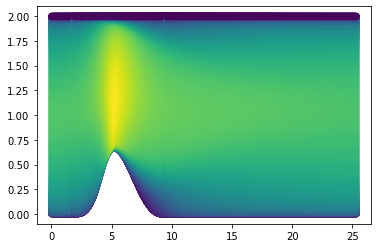

In [53]:
plt.scatter(xx, yy, c=vv)

In [62]:
DATA_FOLDER = "../resources/turbulence/"

# FILENAMES = ["kepsilon_DUCT_3500_p.npy", "kepsilon_DUCT_3500_Ux.npy"]
# FILENAMES = ["kepsilon_DUCT_1100_p.npy", "kepsilon_DUCT_1100_Ux.npy"]
FILENAMES = ["kepsilon_DUCT_2205_p.npy", "kepsilon_DUCT_2205_Ux.npy"]

all_data = np.load(DATA_FOLDER + FILENAMES[0])


xx = np.load(DATA_FOLDER + "kepsilon_DUCT_3500_Cx.npy")
yy = np.load(DATA_FOLDER + "kepsilon_DUCT_3500_Cy.npy")
zz = np.load(DATA_FOLDER + "kepsilon_DUCT_3500_Cz.npy")
vv = np.load(DATA_FOLDER + "kepsilon_DUCT_3500_p.npy")

xx = np.load(DATA_FOLDER + "kepsilonphitf_DUCT_3500_Cx.npy")
yy = np.load(DATA_FOLDER + "kepsilonphitf_DUCT_3500_Cy.npy")
zz = np.load(DATA_FOLDER + "kepsilonphitf_DUCT_3500_Cz.npy")
vv = np.load(DATA_FOLDER + "kepsilonphitf_DUCT_3500_p.npy")

# vv = np.load(DATA_FOLDER + "kepsilon_DUCT_3500_Ux.npy")**2
# + np.load(DATA_FOLDER + "kepsilon_DUCT_3500_Uy.npy")**2
# + np.load(DATA_FOLDER + "kepsilon_DUCT_3500_Uz.npy")**2

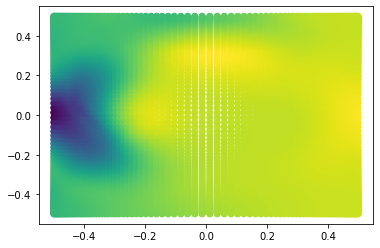

In [57]:
plt.scatter(yy, zz, c=vv)

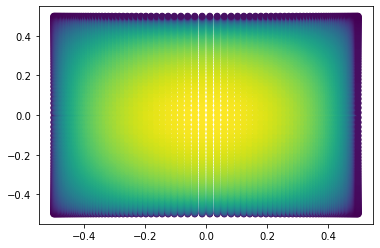

In [23]:
plt.scatter(yy, zz, c=all_data)

In [4]:
all_data.

(9216,)

# Iterative methods

We can see above that a linear regression problem can be solved directly

What happens when we can't invert the matrix?


In [ ]:



class LinearRegressionIterative(BaseRegressor):
    
    
    def zero_grad(self):
        pass
    
    def backward(self, true_values, output_values):
        """
        Numerically calculate the gradient of the loss function wrt the current weights
        """
        pass
    
    def step(self):
        pass
    
    
    
# optimizer.zero_grad()   # zero the gradient buffers
# output = net(input)
# loss = criterion(output, target)
# loss.backward()
# optimizer.step() 

# Improving convergence with alternative optimizers and second-order methods

+ Need a dataset where Linear regression fails
+ Learning rate